In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib

/home/user/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/user/.pyenv/versions/3.7.0/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Using matplotlib backend: Qt5Agg


In [2]:
data = pd.read_csv('vgsales.csv')

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


В таблице имеется 16598 уникальных записей

In [31]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178814,-0.401362,-0.379123,-0.267785,-0.332986,-0.427407
Year,0.178814,1.000000,-0.091402,0.006014,-0.169316,0.041058,-0.074735
NA_Sales,-0.401362,-0.091402,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,-0.379123,0.006014,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,-0.267785,-0.169316,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,-0.332986,0.041058,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,-0.427407,-0.074735,0.941047,0.902836,0.611816,0.748331,1.000000


Что можно увидеть в таблице корреляции? <br>
Продажи в Северной Америке сильно коррелируют с продажами в Евросоюзе, и в меньшей степени с продажами в Японии <br>
Так же продажи в Северной Америке и Евросоюзе коррелируют в общими продажами. <br>

In [4]:
game = data.loc[:,['Name', 'Platform', 'Publisher','Global_Sales']]
game = game.sort_values('Global_Sales', ascending=False)
game.head()

,Name,Platform,Publisher,Global_Sales
0,Wii Sports,Wii,Nintendo,82.74
1,Super Mario Bros.,NES,Nintendo,40.24
2,Mario Kart Wii,Wii,Nintendo,35.82
3,Wii Sports Resort,Wii,Nintendo,33.00
4,Pokemon Red/Pokemon Blue,GB,Nintendo,31.37


Самые продаваемые игры за все время <br>
Все они изданы Nintendo на собственные платформы

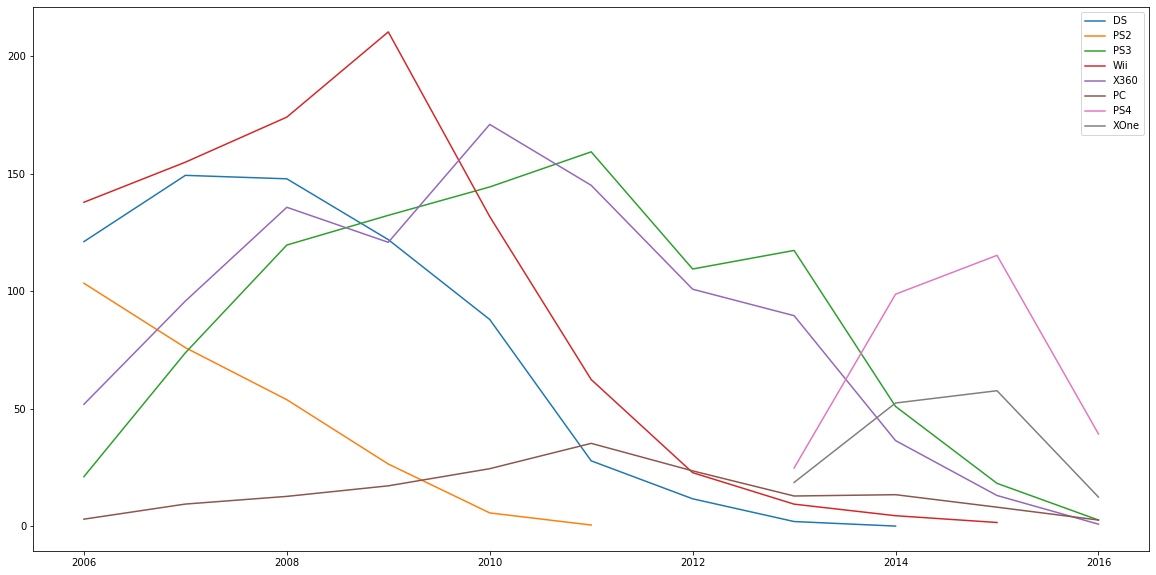

In [17]:
platforms = ['DS', 'PS2', 'PS3', 'Wii', 'X360', 'PC', 'PS4', 'XOne']
perc = data.loc[:,["Year","Platform",'Global_Sales']]
perc['total_sales'] = perc.groupby([perc.Platform,perc.Year])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc[(perc['Year'].astype('float')>=2006.0) & (perc['Year'].astype('float')<=2016.0)]
perc = perc.sort_values("Year",ascending = False)
perc = perc.loc[perc['Platform'].isin(platforms)]
perc = perc.sort_values("Year")

plt.figure(figsize=(20,10))
for i in platforms:
    plt.plot(perc[perc.Platform == i].Year, perc[perc.Platform == i].total_sales, label=i)
plt.legend()

По графику видна динамика изменения популярности игровых платформ. <br>
Ничего удивительного, PC как игровая платформа не была популярнее, чем актуальыне игровые консоли.

Text(0.5, 1.0, 'Number of game launches according to years')

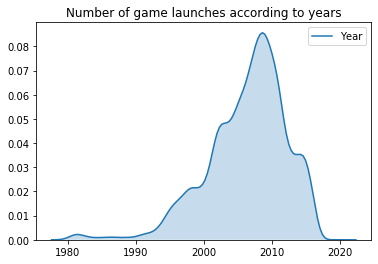

In [19]:
sns.kdeplot(data=data['Year'], label='Year', shade=True)
plt.title('Number of game launches according to years')

Наибольшая плотность распределения, а соответсвенно наиболее частый выход игр, был примерно в 2009 году.

In [21]:
genre = data.loc[:,['Genre','Global_Sales']]
genre['total_sales'] = genre.groupby('Genre')['Global_Sales'].transform('sum')
genre.drop('Global_Sales', axis=1, inplace=True)
genre = genre.drop_duplicates()
genre.sort_values('total_sales', ascending=False)

,Genre,total_sales
16,Action,1751.18
0,Sports,1330.93
9,Shooter,1037.37
4,Role-Playing,927.37
1,Platform,831.37
7,Misc,809.96
2,Racing,732.04
39,Fighting,448.91
10,Simulation,392.20
5,Puzzle,244.95


Самые популярные жанры за все время. <br>
Экшн, спорт и шутеры занимают три первых места, последнее место, незаслуженно, принаждлежит стратегиям.

In [27]:
publisher = data.loc[:,['Publisher','Global_Sales']]
publisher['total_sales'] = publisher.groupby('Publisher')['Global_Sales'].transform('sum')
publisher.drop('Global_Sales', axis=1, inplace=True)
publisher = publisher.drop_duplicates()
publisher = publisher.head(10)
publisher.sort_values('total_sales', ascending=False)

,Publisher,total_sales
0,Nintendo,1786.56
77,Electronic Arts,1110.32
29,Activision,727.46
28,Sony Computer Entertainment,607.50
60,Ubisoft,474.72
16,Take-Two Interactive,399.54
85,Sega,272.99
15,Microsoft Game Studios,245.79
75,Bethesda Softworks,82.14
87,SquareSoft,57.65


Издатели с наибольшем числом продаж игр. Nintendo очень сильно опережает ближайших конкурентов в лице Electronic Arts и Activision. 

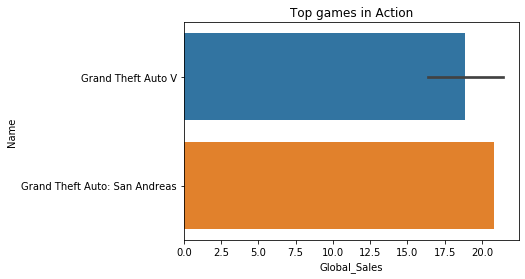

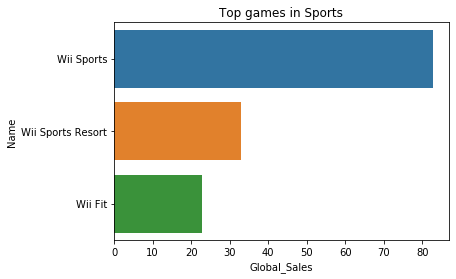

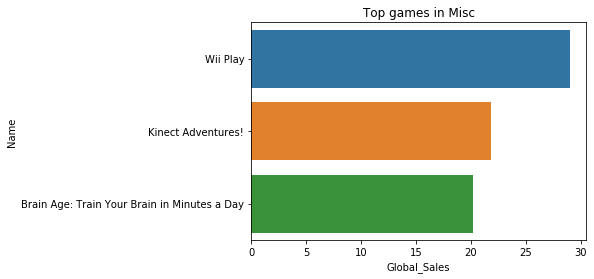

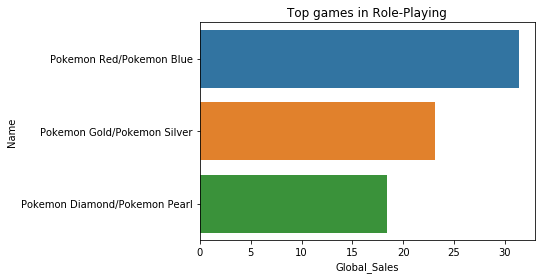

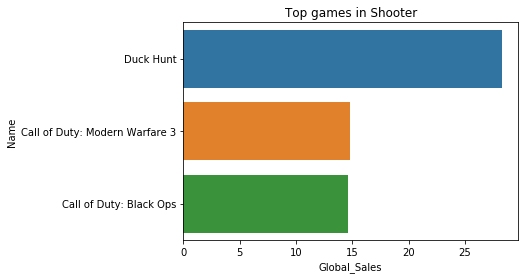

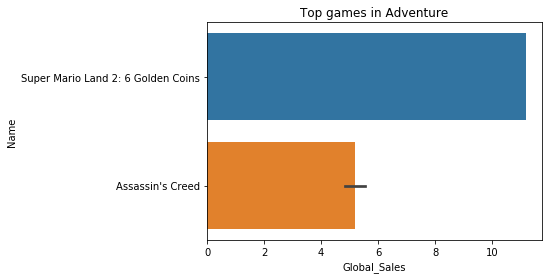

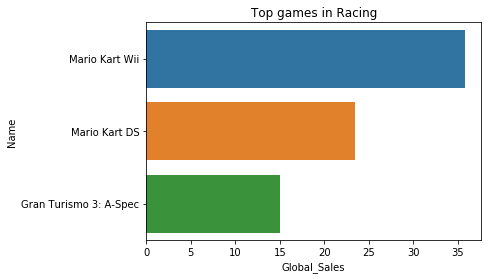

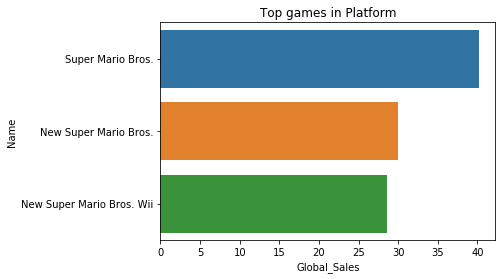

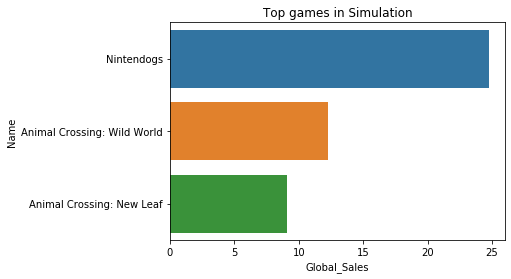

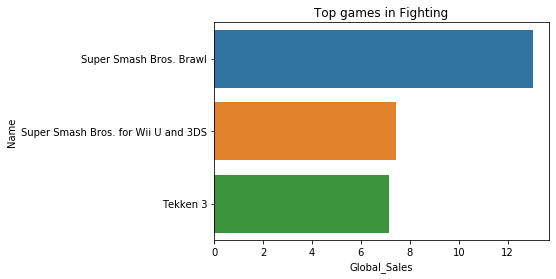

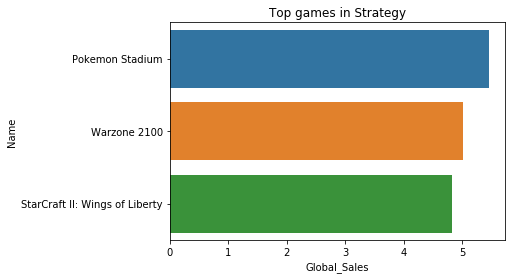

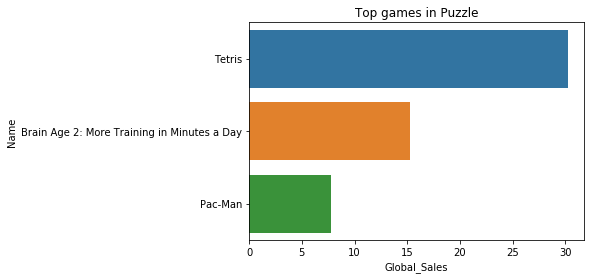

In [29]:
genres = data['Genre'].value_counts().reset_index()['index'].tolist()

for genre,num in zip(genres,range(1,13)):
    df = data[data['Genre']==genre]
    df = df.sort_values('Global_Sales', ascending=False)
    df = df.head(3)
    plt.figure()
    sns.barplot(data=df, x='Global_Sales', y='Name')
    plt.title('Top games in {}'.format(genre))
    plt.show()

Самые продаваемые игры в каждом жанре

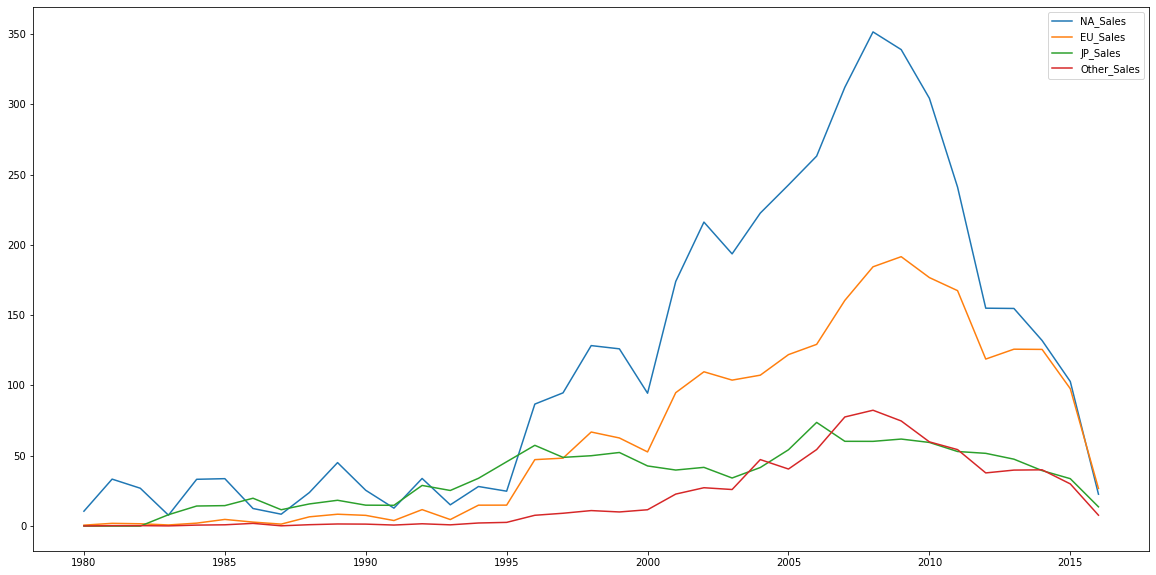

In [39]:
perc = data.loc[:,["Year",'NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
perc[['NA_mean','EU_mean','JP_mean','Other_mean']] = perc.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].transform('sum')
perc.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1, inplace=True)
perc = perc.drop_duplicates()
perc = perc.sort_values("Year")
df = pd.DataFrame({'Place': ['NA_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['NA_mean']})
df1 = pd.DataFrame({'Place': ['EU_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['EU_mean']})
df2 = pd.DataFrame({'Place': ['JP_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['JP_mean']})
df3 = pd.DataFrame({'Place': ['Other_Sales']*perc.shape[0], 'Year':perc['Year'], 'Sales': perc['Other_mean']})
final = pd.concat([df,df1,df2,df3], axis=0)
final = final.sort_values("Year")
final = final[final['Year']<=2016.0]
final

plt.figure(figsize=(20,10))
for i in ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']:
    plt.plot(final[final.Place == i].Year, final[final.Place == i].Sales, label=i)
plt.legend()

Продажи игр. <br>
Видно, как график продаж в Евросоюзе похож на график продаж в Северной Америке. 